# Multi-Linear Regression - Ridge Regression

This type of analysis allows you to understand the relationship between a continuous dependent variable and two or more independent variables.

Steps to perform multi-linear regression:
##### Data Collection
- Collect the dataset or Create the dataset

##### Data Preprocessing
- Import the Libraries.
- Importing the dataset.
- Checking for Null Values.
- Data Visualization.
- Outlier Detection
- Splitting Dependent and Independent variables
- Encoding
- Feature Scaling.
- Splitting Data into Train and Test.

##### Model Building
- Import the model building Libraries
- Initializing the model
- Training and testing the model
- Evaluation of Model
- Save the Model

##### Application Building
- Create an HTML file
- Build a Python Code


## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv("50_Startups.csv")
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
...,...,...,...,...,...
103,119943.24,156547.42,256512.92,Florida,132602.65
104,114523.61,122616.84,261776.23,New York,129917.04
105,78013.11,121597.55,264346.06,California,126992.93
106,94657.16,145077.58,282574.31,New York,125370.37


In [3]:
dataset.shape

(108, 5)

In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [6]:
dataset.corr()

C:\Users\Siri\AppData\Local\Temp\ipykernel_17904\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241379,0.725978,0.964770
Administration,0.241379,1.000000,-0.024699,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.748957
Profit,0.964770,0.198849,0.748957,1.000000


In [7]:
dataset.corr().Profit.sort_values(ascending = False)

C:\Users\Siri\AppData\Local\Temp\ipykernel_17904\372998823.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr().Profit.sort_values(ascending = False)


Profit             1.000000
R&D Spend          0.964770
Marketing Spend    0.748957
Administration     0.198849
Name: Profit, dtype: float64

## Handling Null Values

In [8]:
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

We can see that there are no Null values in this dataset.

In [9]:
dataset.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
dataset.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

## Data Visualization

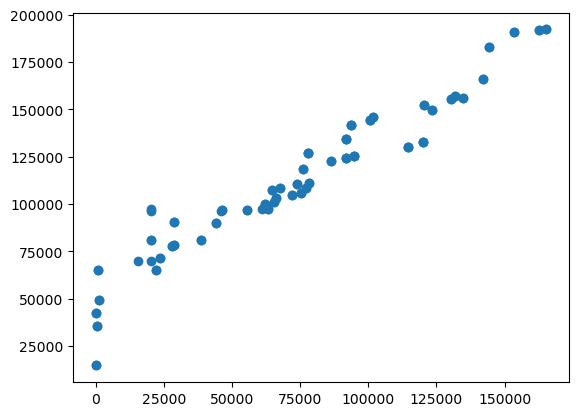

In [11]:
plt.scatter(dataset["R&D Spend"], dataset["Profit"])
plt.show()

C:\Users\Siri\AppData\Local\Temp\ipykernel_17904\2571642465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True)


<Axes: >

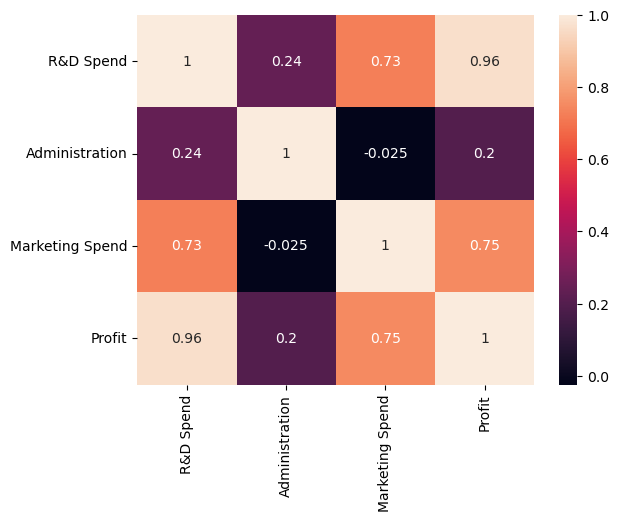

In [12]:
sns.heatmap(dataset.corr(), annot = True)

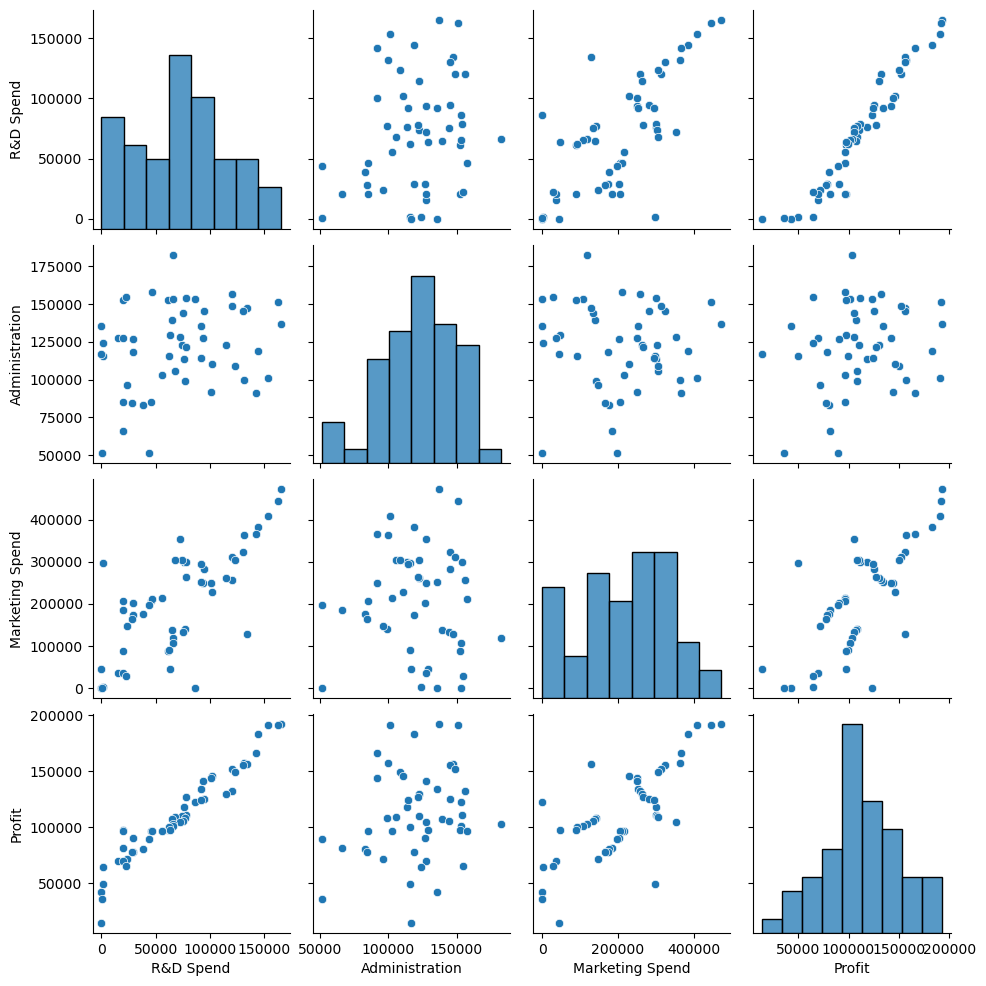

In [13]:
sns.pairplot(dataset)

<Axes: xlabel='State', ylabel='Profit'>

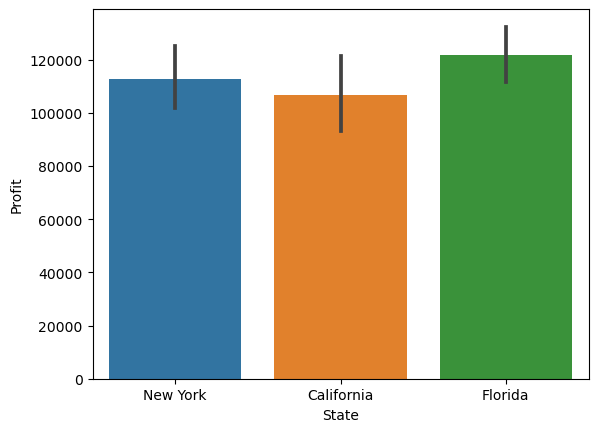

In [14]:
sns.barplot(x = dataset["State"], y = dataset["Profit"])

## Outlier Detection

<Axes: >

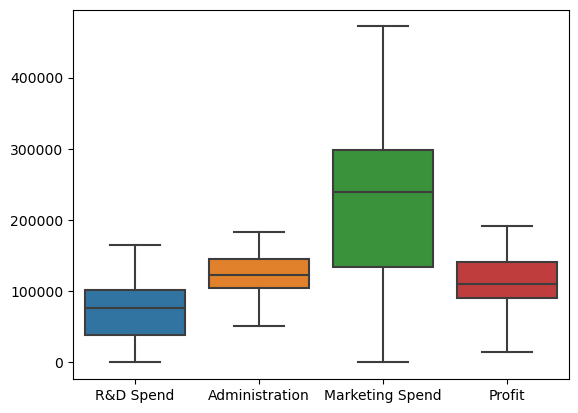

In [15]:
sns.boxplot(dataset)

<Axes: >

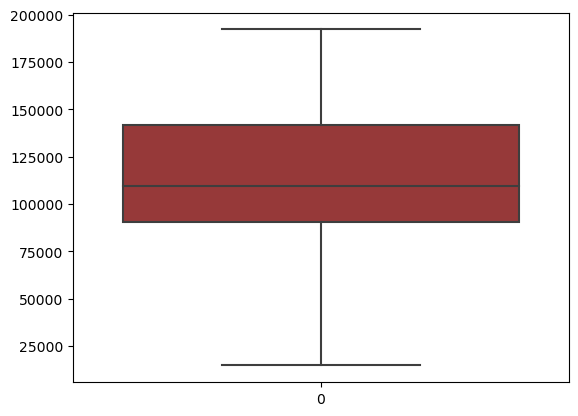

In [16]:
sns.boxplot(dataset["Profit"], color = "brown")

There are negligible outliers in the dataset. Hence we will ignore it.

## Separating Dependent and Independent variables

In [17]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
X = dataset.drop(columns = ["Profit"], axis = 1)
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [19]:
print("Shape of X =", X.shape)
print("Type of X =", type(X))

Shape of X = (108, 4)
Type of X = <class 'pandas.core.frame.DataFrame'>


In [20]:
Y = dataset["Profit"]
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [21]:
print("Shape of Y =", Y.shape)
print("Type of Y =", type(Y))

Shape of Y = (108,)
Type of Y = <class 'pandas.core.series.Series'>


## Encoding the categorical data

In [22]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [23]:
X["State"] = LE.fit_transform(X["State"])
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [24]:
encoding = dict(zip(LE.classes_, range(len(LE.classes_))))
encoding

{'California': 0, 'Florida': 1, 'New York': 2}

## Feature Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler()

In [26]:
X_Scaled = pd.DataFrame(MS.fit_transform(X), columns = X.columns)
X_Scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5


## Splitting the data into train and test sets

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_Scaled, Y, test_size = 0.2, random_state = 0)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (86, 4)
Shape of x_test: (22, 4)
Shape of y_train: (86,)
Shape of y_test: (22,)


## Model Building

In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

In [31]:
parameters = {"alpha":[1, 2, 3, 5, 10, 20, 30, 40, 60, 70, 80, 90]}
lassocv = GridSearchCV(lasso, parameters, scoring = "neg_mean_squared_error", cv = 5)
lassocv.fit(x_train, y_train)
print("Best parameter:", lassocv.best_params_)
print("Best score:", lassocv.best_score_)

Best parameter: {'alpha': 90}
Best score: -110721757.0014207


In [32]:
y_pred = lassocv.predict(x_test)
y_pred

array([ 48927.83791933, 134528.92180333,  76912.54620472, 180627.51083536,
       112577.52383678, 133912.04914422, 128972.14601402, 159791.13149579,
       116903.73177275,  47332.31247228, 102563.05945611, 115538.62217019,
        48927.83791933, 119189.06760396,  88303.1560531 , 127303.38270032,
       127303.38270032,  91362.32546788,  59127.2354756 , 145798.57313566,
       149426.94014553, 152196.76394968])

In [33]:
profit = pd.DataFrame({"Actual profit":y_test, "Predicted profit":y_pred})
profit

,Actual profit,Predicted profit
84,64926.08,48927.837919
10,146121.95,134528.921803
75,90708.19,76912.546205
2,191050.39,180627.510835
24,108552.04,112577.523837
100,144259.40,133912.049144
107,124266.90,128972.146014
7,155752.60,159791.131496
16,126992.93,116903.731773
86,42559.73,47332.312472


In [34]:
from sklearn import metrics
print("The accuracy of the model is", metrics.r2_score(y_test, y_pred))

The accuracy of the model is 0.9270137000817489


In [35]:
print("The training accuracy is: ", metrics.r2_score(y_train, lassocv.predict(x_train)))

The training accuracy is:  0.9375436530639505


In [36]:
lassocv.predict([[1.000000,0.651744,1.000000,1.0]])

C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([192447.05055904])

In [37]:
print("The mean squared error of the model is", metrics.mean_squared_error(y_test, y_pred))

The mean squared error of the model is 94567356.91021091


In [38]:
print("The root mean squared error of the model is:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The root mean squared error of the model is: 9724.574896118129
